Celem zadania jest sprawdzenie jak zachowują się pewne wartości wraz ze wzrostem wymiarowości przestrzeni. Na wszystkie zadane pytania dałoby się odpowiedzieć poprzez analityczne wyprowadzenie odpowiednich tożsamości. Tym razem chcemy jednak poćwiczyć również pracę z niedeterministycznymi algorytmami – dlatego skorzystamy z metody Monte Carlo. Przyjmujemy też, że odległością jest zawsze odległość Euklidesa.

·         Mamy hiperkulę o promieniu równym 1 wpisaną w hipersześcian o krawędziach długości 2. Hiperkulę w przestrzeniach wielowymiarowych definiujemy jako zbiór punktów o odległości od jej środka nie większej niż jej promień. Zapełniamy hipersześcian losowymi punktami o równomiernym rozkładzie (każdy punkt ma taką samą szansę na bycie wylosowanym). Jaki % z tych punktów znajdzie się wewnątrz kuli, a jaki na zewnątrz - w "narożnikach" hipersześcianu?

·         Mamy hipersześcian o krawędziach długości 2. Zapełniamy go losowymi punktami o równomiernym rozkładzie. Jaka jest średnia odległość między dwoma takimi punktami? Jakie jest odchylenie standardowe tej odległości? Jakim % średniej jest to odchylenie?

·         Ponownie mamy losowo zapełniony punktami hipersześcian o krawędziach długości 2. Z tych punktów losujemy (bez zwracania) dwie pary. Punkty z każdej pary wyznaczają pewien wektor (są jego początkiem i końcem). Jaki jest kąt między dwoma wylosowanymi wektorami? Losowanie powtórz wielokrotnie. Jak wygląda rozkład otrzymanych kątów?

Dla wszystkich podpunktów tworzymy odpowiednie wykresy (liniowy, punktowy, histogram - co akurat pasuje), dobierając rozsądny (pozwalający na skończenie obliczeń tego samego wieczora ;]) zakres badanych wymiarów i liczbę punktów generowanych we wnętrzach sześcianów. W konsekwencji - wykres powinien przedstawiać średni rezultat z rozsądnej liczby powtórzeń eksperymentu oraz jego odchylenie standardowe, zaprezentowane jako tzw. error-bars (tylko w ten sposób można wiarygodnie przedstawiać informacje z obserwacji zjawisk losowych). Przypominam również o podpisywaniu osi i uwzględnianiu informacji o jednostkach (jeżeli takowe występują). Warto wykorzystać zadanie jako pretekst do oswojenia się z wybraną biblioteką do rysowania wykresów (jeżeli takiej jeszcze nie mamy).

PS. Tak – w drugim punkcie będziemy musieli poznać średnią i odchylenie standardowe (z kilku eksperymentów) średniej i odchylenia standardowego odległości między punktami.

PS2. Przypominam, że w ramach zadania wrzucamy raport w formacie PDF i ZIP z kodem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
radius = 1

In [2]:
def is_inside_sphere(point):
    dim = point.size
    zero = np.zeros(dim)
    dist = np.linalg.norm(point - zero)
    return dist <= radius

In [3]:
def random_point(dim):
    return np.array([np.random.uniform(low=-1.0, high=1.0) for i in range(dim)])

In [4]:
def get_inside_percent(dim, trials):
    res = [is_inside_sphere(random_point(dim)) for i in range(trials)]
    return sum(res) / len(res)

In [5]:
def fill_cube(dim, n_points):
    return np.array([random_point(dim) for i in range(n_points)])

In [6]:
def point_stats(points):
    dist = []
    n = len(points) * len(points) - 1
    for x in points:
        for y in points:
            if not x is y:
                dist.append(np.linalg.norm(x - y))
    return np.mean(dist), np.std(dist)

In [7]:
def get_angle(points):
    indexes = range(len(points))
    x_1, x_2 = np.random.choice(indexes, 2, replace=False)
    y_1, y_2 = np.random.choice(indexes, 2, replace=False)
    while (x_1, x_2) == (y_1,  y_2):
        xy_1, y_2 = np.random.choice(indexes, 2, replace=False)
    vector_1 = points[x_1] - points[x_2]
    vector_2 = points[y_1] - points[y_2]
    unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
    unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
    return np.arccos(np.clip(np.dot(unit_vector_1, unit_vector_2), -1.0, 1.0))

In [9]:
# print(fill_cube(3,10))
get_angle(fill_cube(3, 10))

2.4095283599572808

In [8]:
print(get_inside_percent(2, 100))

0.75


In [9]:
print(fill_cube(3, 10))

[[-0.18607955  0.70653208 -0.8174787 ]
 [ 0.77185403  0.87845805  0.47302773]
 [-0.19068366 -0.13518669  0.25623139]
 [-0.3516024   0.78812723 -0.22450099]
 [-0.85961999  0.96138719  0.09658208]
 [ 0.99864824  0.76765794  0.11909527]
 [-0.2227752   0.75889812  0.72178116]
 [-0.52078336  0.61656133  0.29609046]
 [ 0.67058397  0.69751343  0.48490929]
 [-0.40840136 -0.91605648 -0.52756703]]


In [10]:
points = fill_cube(3,1000)
print(len(points))
point_stats(points)

1000


(1.328428125333044, 0.5036384493627893)

In [11]:
points = fill_cube(3, 10)
print(points)
pair1 = np.random.choice(len(points), 2, replace=False)
pair2 = np.random.choice(len(points), 2, replace=False)
print(pair1, pair2)

[[ 0.13302953  0.60313731 -0.49911992]
 [ 0.30036386  0.53466981  0.19777776]
 [-0.39568079 -0.48462382 -0.52736483]
 [ 0.22222465 -0.53351787  0.23378957]
 [-0.06456555  0.05158971 -0.39091222]
 [-0.32631644 -0.18194248  0.97937551]
 [ 0.52187531  0.72295029 -0.49868271]
 [-0.80980877  0.85800543  0.35758817]
 [-0.64477737  0.63359411 -0.50044595]
 [ 0.31534831  0.06760894  0.55097332]]
[4 6] [6 4]


## Zad 1

In [12]:
dims = np.arange(2, 30)
trials = np.arange(100, 1000, 100)

trials_res = {}

for t in trials:
    trials_res[t] = []
    for d in dims:
        trials_res[t].append(get_inside_percent(d, t))
        
print(trials_res)

{100: [0.75, 0.57, 0.26, 0.18, 0.08, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 200: [0.75, 0.485, 0.275, 0.175, 0.14, 0.025, 0.015, 0.02, 0.0, 0.005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 300: [0.7766666666666666, 0.5033333333333333, 0.30666666666666664, 0.15333333333333332, 0.09666666666666666, 0.043333333333333335, 0.01, 0.0033333333333333335, 0.0033333333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 400: [0.785, 0.5075, 0.28, 0.17, 0.075, 0.025, 0.02, 0.0075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 500: [0.802, 0.594, 0.29, 0.152, 0.074, 0.044, 0.008, 0.01, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 600: [0.7966666666666666, 0.5616666666666666, 0.3, 0.195, 0.056666666666666664, 

In [9]:
dims = np.arange(1, 15)
t = 100000

res_1 = []

for i in range(100):
    res_1.append([])
    for d in dims:
        res_1[i].append(get_inside_percent(d, t))
np
        
print(res_1)

[[1.0, 0.78473, 0.52358, 0.30924, 0.16281, 0.08289, 0.03654, 0.01601, 0.00608, 0.00255, 0.00106, 0.00036, 0.00016, 5e-05], [1.0, 0.78446, 0.52513, 0.30998, 0.16442, 0.0805, 0.03701, 0.01571, 0.00661, 0.00245, 0.00079, 0.00033, 0.00012, 2e-05], [1.0, 0.78423, 0.52128, 0.30596, 0.16625, 0.07914, 0.03699, 0.01576, 0.00693, 0.00256, 0.00087, 0.00023, 0.0001, 2e-05], [1.0, 0.78653, 0.52377, 0.30895, 0.16435, 0.08046, 0.03791, 0.01554, 0.00633, 0.00246, 0.00077, 0.00037, 0.00012, 2e-05], [1.0, 0.786, 0.52417, 0.31093, 0.16508, 0.08051, 0.03731, 0.01549, 0.00685, 0.00228, 0.00084, 0.00034, 0.00012, 5e-05], [1.0, 0.78517, 0.52252, 0.31112, 0.16526, 0.08198, 0.03737, 0.01541, 0.00621, 0.00239, 0.00111, 0.00045, 0.00012, 6e-05], [1.0, 0.78477, 0.52666, 0.30846, 0.16517, 0.07981, 0.03669, 0.0153, 0.00632, 0.00225, 0.00079, 0.00025, 0.00016, 3e-05], [1.0, 0.78494, 0.52336, 0.30868, 0.16472, 0.08036, 0.03704, 0.01621, 0.00626, 0.00238, 0.00083, 0.0003, 0.0001, 2e-05], [1.0, 0.78406, 0.52403, 0.3084

In [10]:
res_1 = np.array(res_1)
# print(np.std(res_1[:,0]))
std = [np.std(col) for col in res_1.T]
mean = [np.mean(col) for col in res_1.T]
# print(std)
# print(mean)

In [11]:
print(std)

[0.0, 0.0009976793071924486, 0.0013699649630556352, 0.0015764710590429455, 0.0010408093004964912, 0.0011766324829784354, 0.0005986894019439468, 0.00034311659825779316, 0.00026624049278800555, 9.533624704172079e-05, 0.00011426285485668561, 6.85638388656878e-05, 2.282542442102666e-05, 1.615549442140351e-05]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

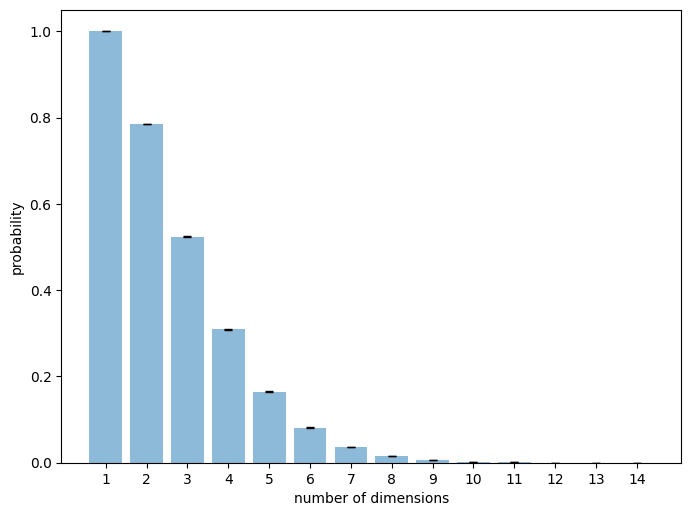

In [12]:
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.bar(dims, mean, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(dims)
plt.xlabel("number of dimensions")
plt.ylabel("probability")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

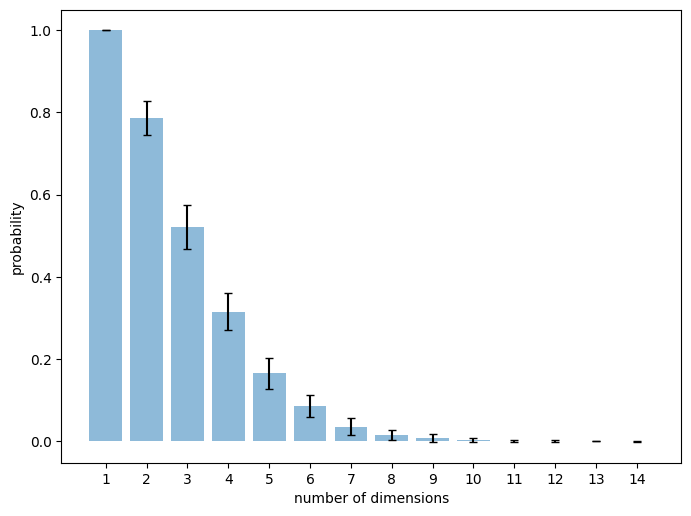

In [15]:
dims = np.arange(1, 15)
t = 100

res_1 = []

for i in range(100):
    res_1.append([])
    for d in dims:
        res_1[i].append(get_inside_percent(d, t))
        
res_1 = np.array(res_1)
std = [np.std(col) for col in res_1.T]
mean = [np.mean(col) for col in res_1.T]

fig = plt.figure(figsize=(8, 6), dpi=100)
plt.bar(dims, mean, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(dims)
plt.xlabel("number of dimensions")
plt.ylabel("probability")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

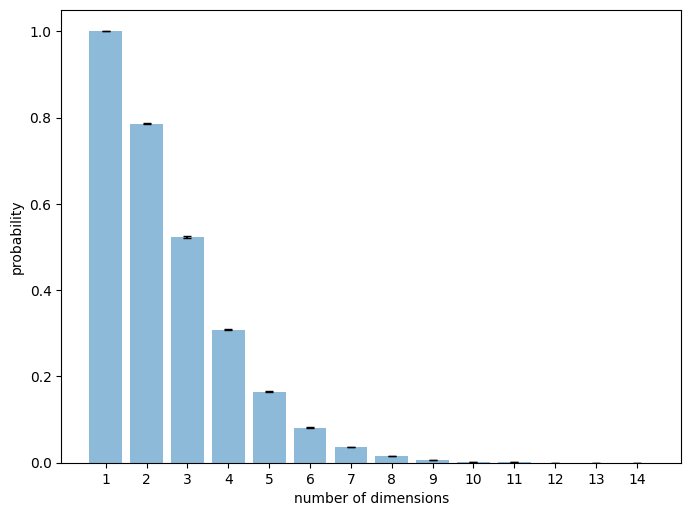

In [70]:
fig = plt.figure(figsize=(8, 6), dpi=100)
# mean = [np.mean(res) for i in dims]
# std = [np.std(res) for i in dims]
plt.bar(dims, mean, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=3)
# plt.plot(dims, mean, color='red')
plt.xticks(dims)
plt.xlabel("number of dimensions")
plt.ylabel("probability")
plt
# plt.errorbar(dims, res, yerr=std, color='orange')

In [ ]:
print(np.std(res), np.mean(res))

## Zad 2

In [86]:
n_points = 100
res_2 = []
dims = np.arange(1, 100)

for i in range(100):
    res_2.append([])
    for d in dims:
        res_2[i].append(point_stats(fill_cube(d, n_points)))
        
res_2 = np.array(res_2)

In [130]:
print(len(res_2[:,98,1]))

means = [np.mean(res_2[:,i, 0]) for i in range(len(dims))]
means_stds = [np.std(res_2[:,i, 0]) for i in range(len(dims))]

stds = [np.mean(res_2[:, i, 1]) for i in range(len(dims))]
stds_stds = [np.std(res_2[:, i, 1]) for i in range(len(dims))]

percent = np.array(stds) / np.array(means)
percent_stds = [np.std(percent) for i in range(len(dims))]
print(percent)

100
[0.71571402 0.48803617 0.39005184 0.3357202  0.30033109 0.27513691
 0.25634797 0.24039797 0.2282479  0.2181933  0.20948928 0.20339509
 0.1963495  0.19093703 0.1857254  0.18189523 0.1779082  0.17442916
 0.17149138 0.16814949 0.16562467 0.16270763 0.1610144  0.15873301
 0.1565368  0.1550169  0.15339058 0.15200097 0.15008454 0.14888895
 0.14738096 0.14604305 0.14464978 0.14393245 0.14272132 0.14174756
 0.1407123  0.13971114 0.1387279  0.13787451 0.137124   0.13641386
 0.13547553 0.13506269 0.134224   0.13371639 0.13308709 0.13223312
 0.13175871 0.1313035  0.13059217 0.13013082 0.12980248 0.12897509
 0.12862044 0.12810624 0.12788704 0.12731359 0.12691947 0.12651783
 0.12631171 0.12577746 0.12549515 0.12504414 0.12469877 0.12452794
 0.12418678 0.12378771 0.12367109 0.123158   0.12273598 0.12261986
 0.12242304 0.12206752 0.12178274 0.12158903 0.12126698 0.12114426
 0.12074022 0.12065839 0.12026262 0.12013275 0.11979918 0.1197404
 0.11945254 0.11929659 0.11888713 0.11886419 0.11868131 0.1

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

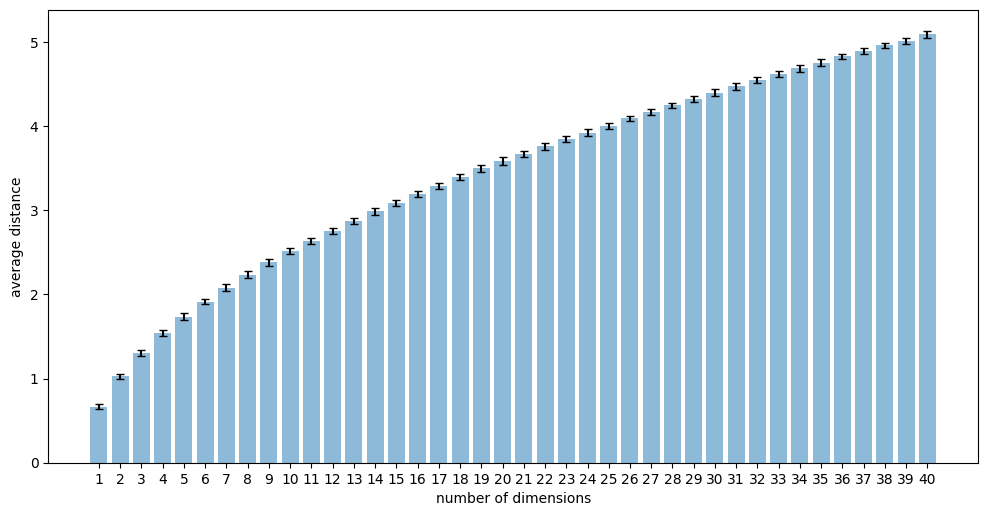

In [125]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 40
plt.bar(dims[:c], means[:c], yerr=means_stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(dims[:c])
plt.xlabel("number of dimensions")
plt.ylabel("average distance")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

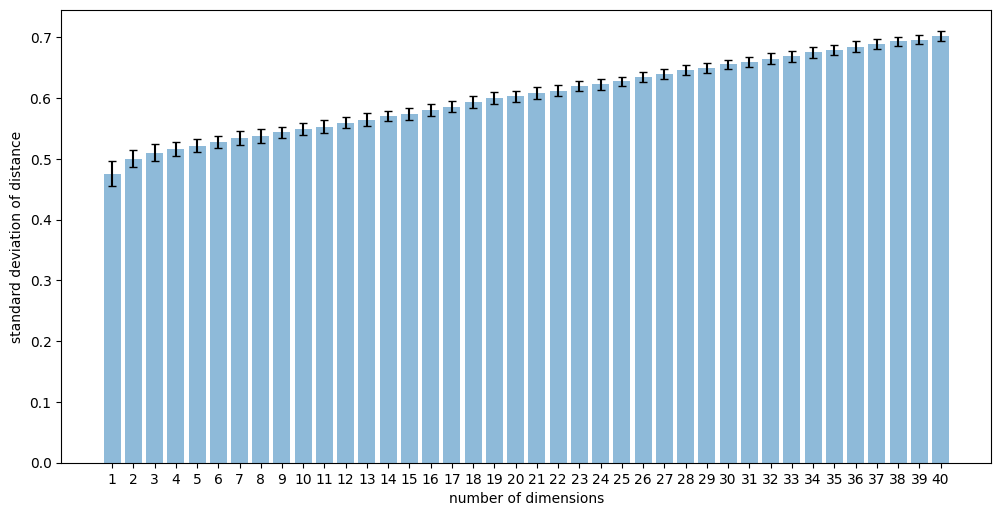

In [128]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 40
plt.bar(dims[:c], stds[:c], yerr=stds_stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(dims[:c])
plt.xlabel("number of dimensions")
plt.ylabel("standard deviation of distance")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

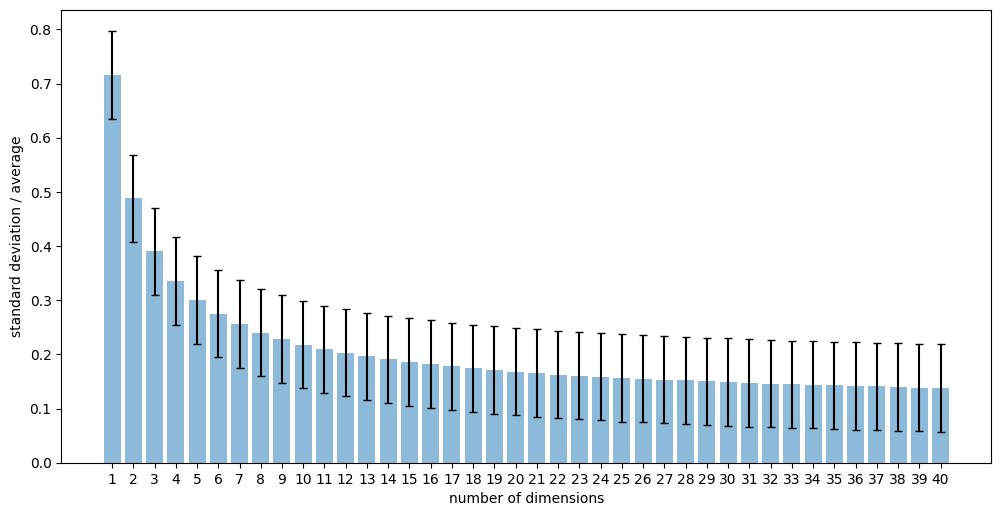

In [146]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 40
plt.bar(dims[:c], percent[:c], yerr=percent_stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(dims[:c])
plt.xlabel("number of dimensions")
plt.ylabel("standard deviation / average")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

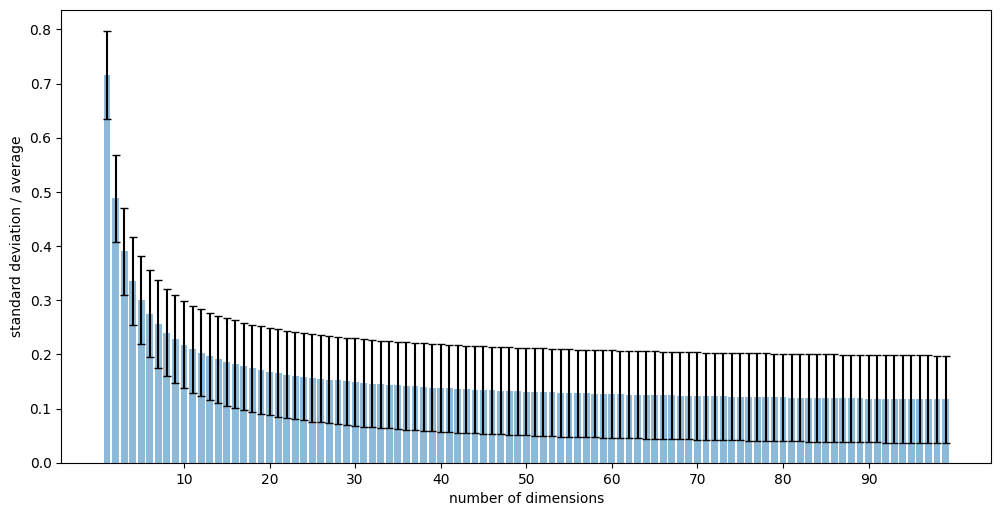

In [147]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 100
plt.bar(dims[:c], percent[:c], yerr=percent_stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(list(filter(lambda i : i % 10 == 0, dims)))
plt.xlabel("number of dimensions")
plt.ylabel("standard deviation / average")
plt

In [144]:
list(filter(lambda i : i % 10 == 0, dims))

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [29]:
n_points = 1000
res_2 = []
dims = np.arange(1, 100)

for i in range(100):
    res_2.append([])
    for d in dims:
        res_2[i].append(point_stats(fill_cube(d, n_points)))
        
res_2 = np.array(res_2)

means = [np.mean(res_2[:,i, 0]) for i in range(len(dims))]
means_stds = [np.std(res_2[:,i, 0]) for i in range(len(dims))]

stds = [np.mean(res_2[:, i, 1]) for i in range(len(dims))]
stds_stds = [np.std(res_2[:, i, 1]) for i in range(len(dims))]

percent = np.array(stds) / np.array(means)
percent_stds = [np.std(percent) for i in range(len(dims))]

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 40
plt.bar(dims[:c], means[:c], yerr=means_stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(dims[:c])
plt.xlabel("number of dimensions")
plt.ylabel("average distance")
plt

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 40
plt.bar(dims[:c], stds[:c], yerr=stds_stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(dims[:c])
plt.xlabel("number of dimensions")
plt.ylabel("standard deviation of distance")
plt

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 40
plt.bar(dims[:c], percent[:c], yerr=percent_stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(dims[:c])
plt.xlabel("number of dimensions")
plt.ylabel("standard deviation / average")
plt

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 100
plt.bar(dims[:c], percent[:c], yerr=percent_stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(list(filter(lambda i : i % 10 == 0, dims)))
plt.xlabel("number of dimensions")
plt.ylabel("standard deviation / average")
plt

In [158]:
# fig = plt.figure(figsize=(8, 6), dpi=100)
# plt.bar(dims, res_2[:,0])
# percent = res_2[:,0] / res_2[:,1]
# plt.bar(dims, percent)
# print(percent)
# plt.errorbar(dims, res_2[:,0], yerr=res_2[:,1], color='red')

In [ ]:
print(percent)

## Zad 3

In [18]:
n_points = 100
res_3 = []
dims = np.arange(2, 100)

for i in range(len(dims)):
    res_3.append([])
    points = fill_cube(dims[i], n_points)
    for j in range(10000):
        res_3[i].append(get_angle(points))
        
np.array(res_3)

array([[2.19448041, 1.97298802, 0.79778385, ..., 0.77155858, 1.56455583,
        2.6424184 ],
       [1.36911587, 1.28009564, 1.74873747, ..., 1.8983124 , 0.43638754,
        2.37819995],
       [1.95145886, 2.708219  , 2.24884301, ..., 2.28310907, 2.37117587,
        1.04205471],
       ...,
       [1.60367344, 1.6378303 , 1.6482638 , ..., 1.53551695, 1.78925228,
        1.78809422],
       [1.60008218, 1.95020004, 1.54886468, ..., 1.59368941, 1.5514269 ,
        1.57014526],
       [1.65780293, 1.53854974, 1.64295956, ..., 1.55745032, 1.61892872,
        1.49556753]])

In [176]:
print(res_3[0])

[4.04482379641298e-05, 0.9370415412311891, 1.4242874365067875, 0.8481212505471585, 0.6429875890670036, 2.516614363725729, 0.6598546197866434, 1.2906445447875663, 0.5264193546856053, 0.24791051089032173, 0.0023134536902863706, 1.292720216954665, 2.0922002652724316, 3.036971501945654, 1.8696167930643663, 0.759383987261656, 1.6426170442817252, 2.28645383697648, 1.0263495357045354, 2.5605140044447703, 2.9440821857212502, 1.3661058909235382, 3.003110914566299, 2.9323168637909833, 1.3225722623522767, 1.7166519437689072, 0.9139283798424926, 2.668780790258848, 1.9491617392913412, 1.985907709075579, 1.7550045003351533, 2.9627784243669217, 2.007823675296777, 2.7810179963134445, 3.1038233028293947, 0.584856741112059, 2.516712399537633, 0.4972121521403831, 0.9078787795912858, 1.6540595317619742, 2.519303675183824, 0.5416891285351333, 2.7018711436882064, 2.0654720183805035, 2.8159819519249796, 0.122619785480287, 2.0575447305199805, 2.8967561197117337, 0.21342417826706178, 0.4780247364583692, 2.7272

In [19]:
means = [np.mean(res_3[i]) for i in range(len(dims))]
stds = [np.std(res_3[i]) for i in range(len(dims))]

print(means)
print(stds)

[1.566688514778022, 1.5606197976735807, 1.5798750293679933, 1.5679030805555936, 1.5663584131853652, 1.5722494192764043, 1.5688742354915435, 1.563842440847214, 1.5711778216456478, 1.5725957248237037, 1.5725527574996963, 1.5682818246754275, 1.571780905968025, 1.5705526534649206, 1.5681582726809251, 1.572711251325457, 1.56701753334395, 1.5691164889386549, 1.5730202825520394, 1.5720158273363407, 1.5690025006722288, 1.5685071148541574, 1.572897856673699, 1.565918475715029, 1.5706395164883673, 1.5705750379949035, 1.5666980713281902, 1.5684041556280417, 1.5675083171918893, 1.5697696382942394, 1.5687817679472236, 1.575398338237782, 1.5730707929254149, 1.5695932922849818, 1.5724132934886066, 1.5680295860610014, 1.5672555485867432, 1.5717480815417104, 1.569280259379746, 1.5683914785738, 1.571713671923929, 1.571651904942169, 1.5718194007928168, 1.5705427023414174, 1.5645984630488474, 1.5694717385080343, 1.570286575311461, 1.5692665298168464, 1.5726857065960913, 1.5683968111280375, 1.5709120489076

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

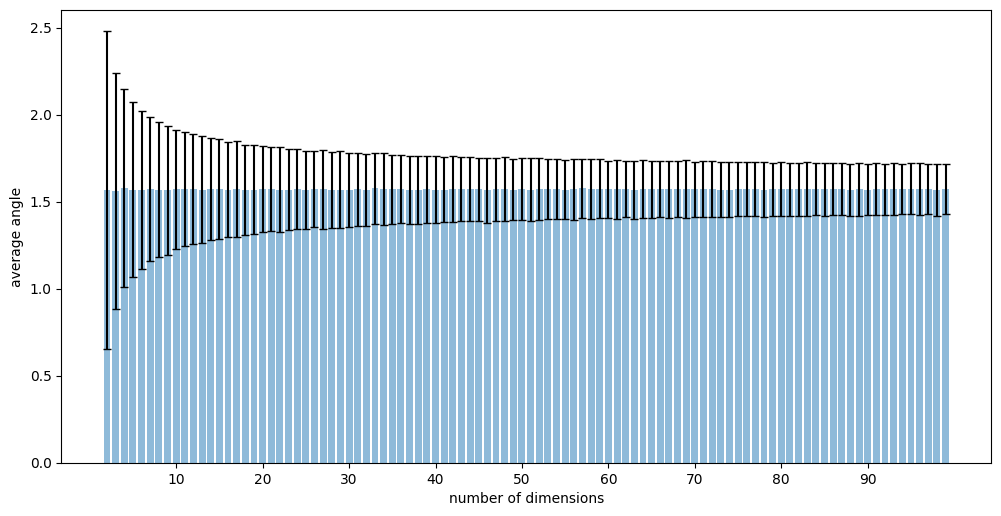

In [21]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 100
plt.bar(dims[:c], means[:c], yerr=stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(list(filter(lambda i : i % 10 == 0, dims)))
plt.xlabel("number of dimensions")
plt.ylabel("average angle")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

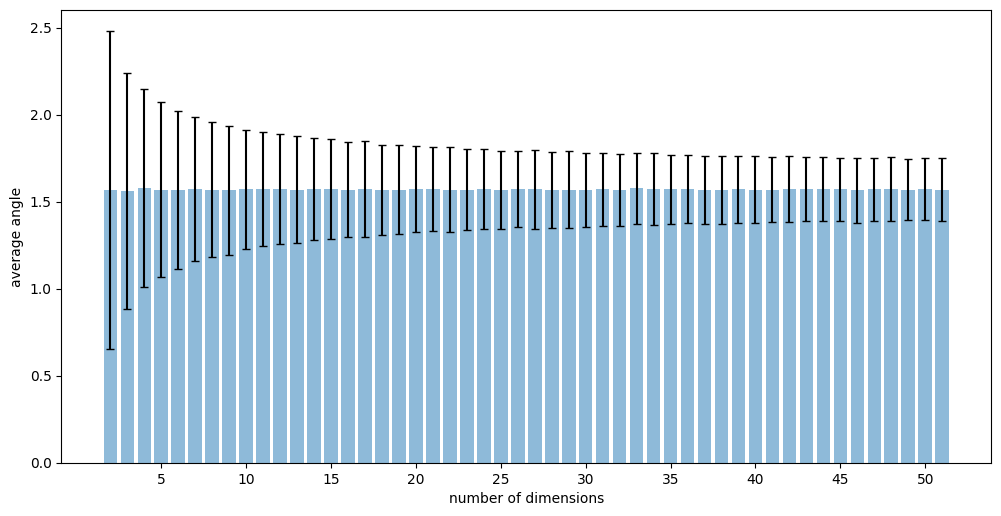

In [26]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 50
plt.bar(dims[:c], means[:c], yerr=stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(list(filter(lambda i : i % 5 == 0, dims[:c])))
plt.xlabel("number of dimensions")
plt.ylabel("average angle")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

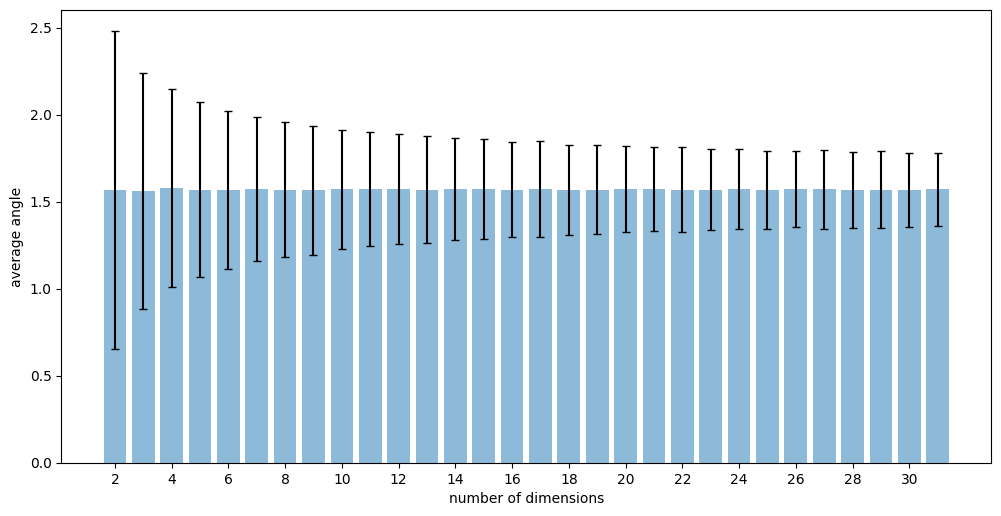

In [28]:
fig = plt.figure(figsize=(12, 6), dpi=100)
c = 30
plt.bar(dims[:c], means[:c], yerr=stds[:c], align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(list(filter(lambda i : i % 2 == 0, dims[:c])))
plt.xlabel("number of dimensions")
plt.ylabel("average angle")
plt